# Regresion Lineal
1.   Modelo
2.   Funcion de costo
3.   Gradiente descendente

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
!wget lalussoft.com/mldemos/notas.csv

--2021-05-28 21:06:59--  http://lalussoft.com/mldemos/notas.csv
Resolving lalussoft.com (lalussoft.com)... 34.198.109.148
Connecting to lalussoft.com (lalussoft.com)|34.198.109.148|:80... connected.
HTTP request sent, awaiting response... 302 Redirect
Location: https://lalussoft.com/mldemos/notas.csv [following]
--2021-05-28 21:06:59--  https://lalussoft.com/mldemos/notas.csv
Connecting to lalussoft.com (lalussoft.com)|34.198.109.148|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 428 [application/octet-stream]
Saving to: ‘notas.csv’

notas.csv           100%[===================>]     428  --.-KB/s    in 0s      

2021-05-28 21:06:59 (80.1 MB/s) - ‘notas.csv’ saved [428/428]



In [ ]:
notas = pd.read_csv("notas.csv")
notas.head()

,PorcentajeAsistencia,Nota
0,0.85,18
1,0.85,17
2,0.90,18
3,0.75,17
4,0.90,17


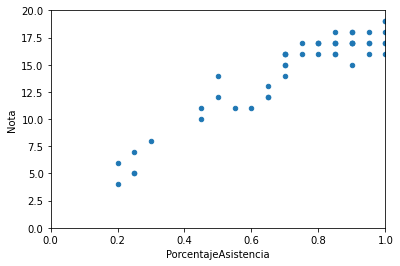

In [ ]:
notas.plot(x="PorcentajeAsistencia", y="Nota", kind="scatter", xlim=(0,1), ylim=(0,20))

In [ ]:
x= notas.values[:,0] #la columna 0 del dataframe se guarda en X
y = notas.values[:, 1] #la columna 1 se guarda en y. es del tipo nd array
print("**********valores de X***********\n",x)
print("**********valores de Y***********\n", y)


**********valores de X***********
 [0.85 0.85 0.9  0.75 0.9  1.   0.85 0.95 0.85 0.9  0.55 0.8  0.85 1.
 0.7  0.5  0.7  0.95 0.2  0.65 0.75 1.   1.   1.   0.65 0.8  0.9  0.7
 1.   0.8  0.3  0.5  0.7  0.25 0.85 0.9  0.9  0.25 0.45 0.7  0.65 0.7
 0.95 0.25 0.6  0.2  0.45 0.8  0.95 0.9 ]
**********valores de Y***********
 [18. 17. 18. 17. 17. 18. 17. 18. 16. 17. 11. 17. 16. 19. 16. 14. 16. 17.
  6. 12. 16. 16. 19. 17. 13. 17. 17. 14. 17. 16.  8. 12. 16.  5. 17. 15.
 18.  7. 10. 15. 12. 15. 17.  5. 11.  4. 11. 17. 16. 17.]


# Regresion Lineal con 1 parametro
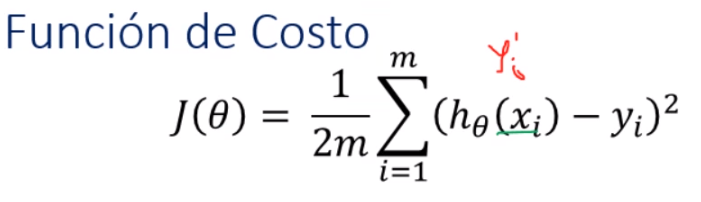

In [ ]:
def CalcularCosto1(x,y,theta):
  m = len(y)
  J = 0
  for i in range(m):
    J=J+(theta*x[i] - y[i])**2
  return J/(2*m)

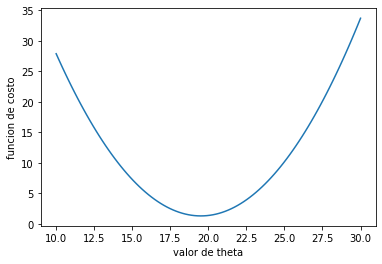

In [ ]:
c=[]  #costo
t=[]  #parametro
#se calcula la funcion de costo para diferentes valores de theta
#en este caso se toma 100 valores desde 10 hasta 30
for i in np.linspace(10,30, 100):
  c.append(CalcularCosto1(x,y,i))
  t.append(i)


plt.plot(t,c) #grafico (ejex=valor de theta,ejey= costo para ese valor de theta)
plt.xlabel("valor de theta")
plt.ylabel("funcion de costo")
plt.show()

In [ ]:
#HALLANDO EL THETA OPTIMO
def GradienteDescendente1 (x,y,theta, alpha, num_iters): #(X,Y,theta inicial, paso, iteraciones)
  m=len(y)
  th = np.zeros(num_iters)
  jh = np.zeros(num_iters)
  for iter in range(num_iters):
    s=0
    for i in range(m): #hallo el costo para mi theta actual
      s=s+(theta*x[i]-y[i])*x[i]

    theta = theta - (alpha/m)*s #hallo el nuevo valor de theta

    #guardar el historial de los costos
    jh[iter]=CalcularCosto1(x,y,theta)

    #guardar el historial de los parametros
    th[iter]=theta
  return (theta, jh, th)


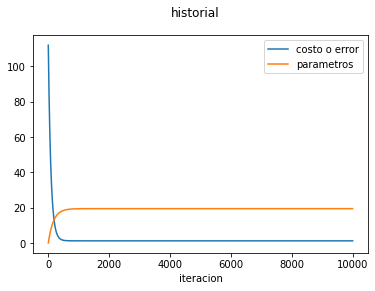

In [ ]:
theta_inicial =0
max_iter = 10000
alpha = 0.01
(theta_final, jh, th) = GradienteDescendente1(x,y,theta_inicial, alpha, max_iter)
plt.suptitle("historial")
plt.xlabel("iteracion")
plt.plot(jh, label="costo o error")
plt.plot(th, label="parametros")
plt.legend()

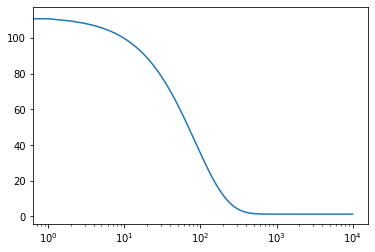

In [36]:
plt.plot(jh)
plt.xscale("log")
plt.show()

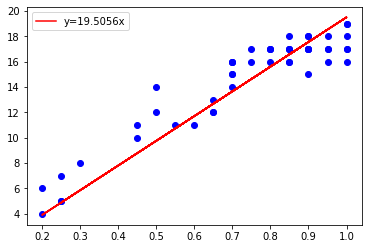

In [37]:
plt.scatter(x,y, color="blue")
yp = x*theta_final
plt.plot(x,yp, color="red", label="y={:.4f}x".format(theta_final))
plt.legend()
plt.show()

Coeficiente de determinacion

In [38]:
ymean= np.mean(y)
SStot = np.sum( (y-ymean)**2 )
SSres = np.sum( (y-yp)**2 )

R2 = 1- (SSres / SStot)
R2

0.8297147273552833

# Regresion lineal usando 2 paramteros

In [39]:
def CalcularCosto2(x, y, theta):
  m= len(y)
  j=0
  for i in range(m):
    j = j + ( (theta[0]+theta[1]*x[i]) - y[i])**2
  return j/(2*m)

In [40]:
#MATRIZ DE COSTOS
#para cada valor theta[0] y theta[1]
costo = np.array([  [i, j, CalcularCosto2(x,y,[i,j])] for i in np.linspace(-100,100,25) for j in np.linspace(-100,100,25)  ])

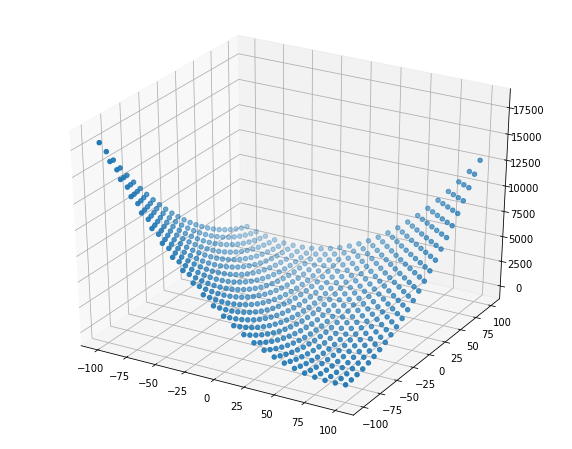

In [43]:
plt.figure(figsize=(10,8))
ax=plt.axes(projection="3d")
ax.scatter(costo[:,0], costo[:,1], costo[:,2])


In [45]:
def GradienteDescendente2 (x,y,theta, alpha, num_iters):
  m=len(y)
  th = np.zeros(num_iters)
  jh = np.zeros(num_iters)


  for iter in range(num_iters):
    
    #OPTIMIZAMOS THETA[0]
    s=0
    for i in range(m):
      s=s+((theta[0]+ theta[1]*x[i])-y[i])

    t0 = theta[0]-(alpha/m)*s


    #OPTIMIZAMOS THETA[1]
    s=0
    for i in range(m):
      s=s+((theta[0]+ theta[1]*x[i]-y[i]))*x[i]

    t1 = theta[1]-(alpha/m)*s

    #GUARDAMOS EN UN ARRAY LOS THETAS NUEVOS
    theta = np.array( [t0, t1])

    #GUARDAMOS EN UN ARRAY LOS COSTOS NUEVOS
    jh[iter]=CalcularCosto2(x,y,theta)
    

  return (theta, jh)


In [46]:
theta_inicial=(10, 1)
max_iter = 10000
alpha = 0.01
(theta,jh)=GradienteDescendente2(x, y, theta_inicial, alpha, max_iter)

theta[0]=3.34 	 theta[1]=15.33 
costo final:  0.8629419248233126



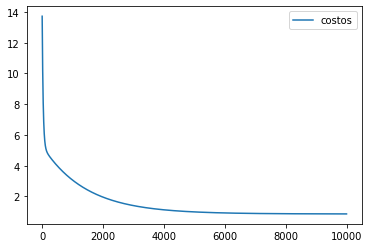

In [63]:
print("theta[0]={:.2f} \t theta[1]={:.2f} ".format(theta[0], theta[1]))
print("costo final: ",jh[-1])
print()
plt.plot(jh, label="costos")
plt.legend()

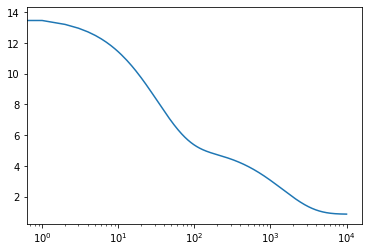

In [66]:
plt.plot(jh)
plt.xscale("log")
plt.show()

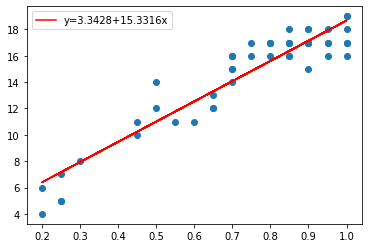

In [70]:
plt.scatter(x,y)

#acondicionamos X de [x1] hacia [1 x1]
yp =np.column_stack((np.ones(len(y)),x)).dot(theta) #entonces obtenemos 1*theta[0] + x1*theta[1]

#ploteamos la recta
plt.plot(x, yp, color="red", label="y={:.4f}+{:.4f}x".format(theta[0], theta[1]))
plt.legend()
plt.show()

In [71]:
ymean= np.mean(y)
SStot = np.sum( (y-ymean)**2 )
SSres = np.sum( (y-yp)**2 )

R2 = 1- (SSres / SStot)
R2

0.8859176218472129

# Regresion lineal con scikit-learn

In [77]:
from sklearn import linear_model as sklm

In [78]:
#de una fila a una columna
XX = x[:,np.newaxis] #x.reshape(len(x),1)

In [80]:
modelo1 = sklm.LinearRegression(fit_intercept=False)
modelo1.fit(XX,y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

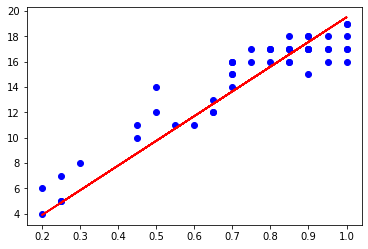

In [81]:
yp1 = modelo1.predict(XX)
plt.scatter(x,y, color="blue")
plt.plot(XX, yp1, color="red")

In [84]:
modelo1.score(XX,y)

0.8297147273552834

In [94]:
modelo2 = sklm.LinearRegression(fit_intercept=True)
modelo2.fit(XX,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

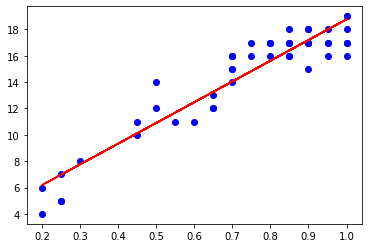

In [95]:
yp2 = modelo2.predict(XX)
plt.scatter(x,y, color="blue")
plt.plot(XX, yp2, color="red")

In [96]:
modelo2.score(XX,y)

0.8864575283757592

In [97]:
modelo2 = sklm.LinearRegression(fit_intercept=True, n_jobs=None, normalize=True)
modelo2.fit(XX,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

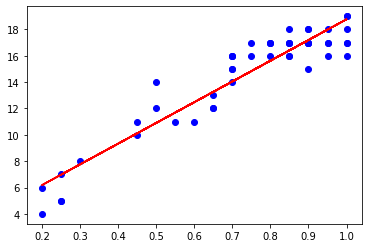

In [98]:
yp2 = modelo2.predict(XX)
plt.scatter(x,y, color="blue")
plt.plot(XX, yp2, color="red")

In [99]:
modelo2.score(XX,y)

0.8864575283757592

In [103]:
yp2 = modelo2.predict(XX)

In [107]:
modelo1.coef_

array([19.50564852])

In [109]:
modelo2.coef_

array([15.71699608])

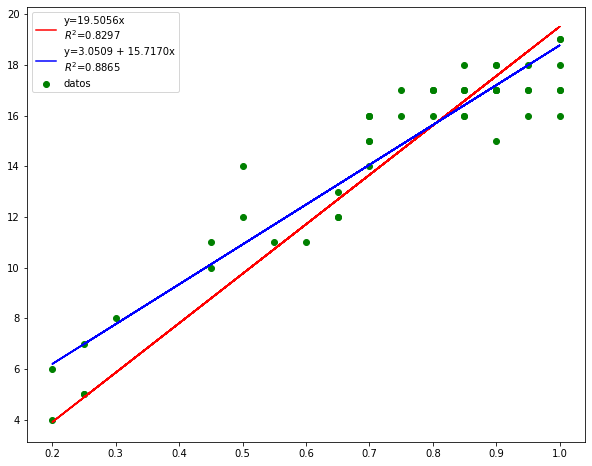

In [112]:
plt.figure(figsize=(10,8))
plt.scatter(x,y,color="green",label="datos")
plt.plot(x,yp1,color="red",
         label="y={:.4f}x\n$R^2$={:.4f}".format(
             modelo1.coef_[0],modelo1.score(XX,y)))
plt.plot(x,yp2,color="blue",
         label="y={:.4f} + {:.4f}x\n$R^2$={:.4f}".format(
             modelo2.intercept_, modelo2.coef_[0], modelo2.score(XX,y)))
plt.legend()
plt.show()

In [113]:
notas.isnull().sum()

PorcentajeAsistencia    0
Nota                    0
dtype: int64